# *Data loading*

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('loan_data.csv')
df = pd.DataFrame(data)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# *EDA*

In [41]:
df.shape

(45000, 14)

In [42]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns
for columna in cat_cols:
        print(f"Valores únicos en {columna}:\n")
        print(df[columna].unique(), "\n")

Valores únicos en person_gender:

['female' 'male'] 

Valores únicos en person_education:

['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate'] 

Valores únicos en person_home_ownership:

['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

Valores únicos en loan_intent:

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'] 

Valores únicos en previous_loan_defaults_on_file:

['No' 'Yes'] 



In [43]:
print("Valores nulos:\n")
print(df.isnull().sum(), "\n")

Valores nulos:

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64 



In [44]:
print("Valores duplicados:\n")
print(df.duplicated().sum(), "\n")

Valores duplicados:

0 



In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


## There are values that cannot be possible (Outliers)
* Ages over 100
* Ages of experience over 100
* Annual incomes over $7,000,000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

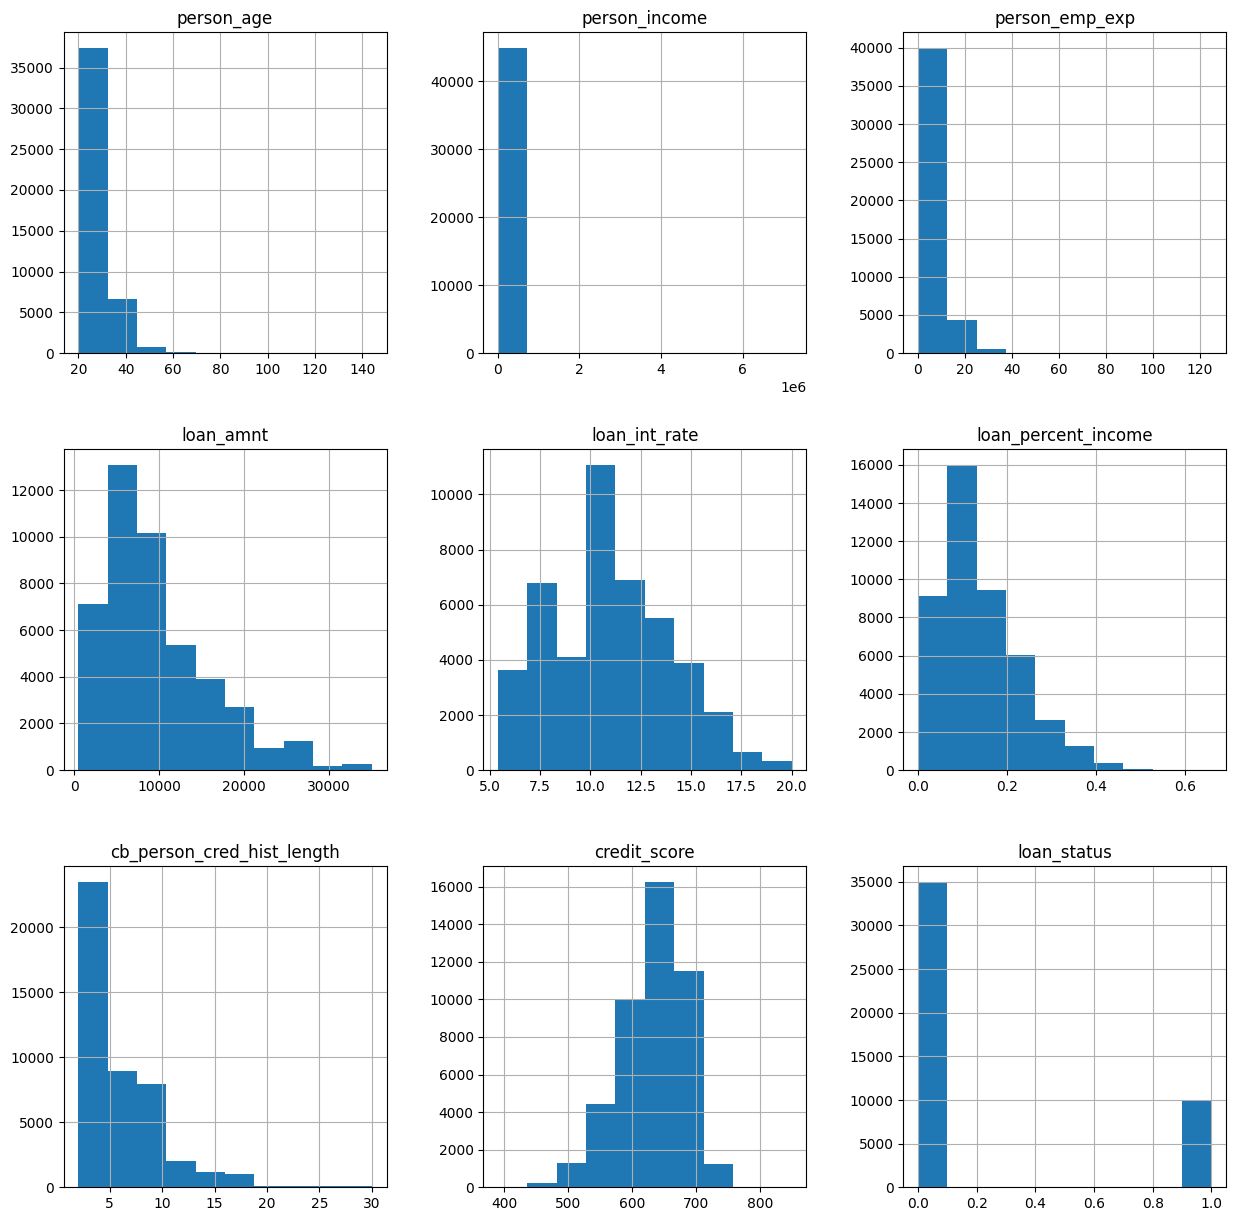

In [47]:
df.hist(figsize=(15,15))
plt.show()

# *Outliers*

In [60]:
for col in num_cols:
    Q1 = df[col].quantile(0.01)
    Q3 = df[col].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mean_value = df[col].mean()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                       mean_value, df[col])

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.746958,5.901019,20.00,24.00,26.00,30.00,84.00
person_income,45000.0,78528.815882,49459.591959,8000.00,47204.00,67048.00,95341.75,649823.00
person_emp_exp,45000.0,5.392962,5.917345,0.00,1.00,4.00,8.00,62.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


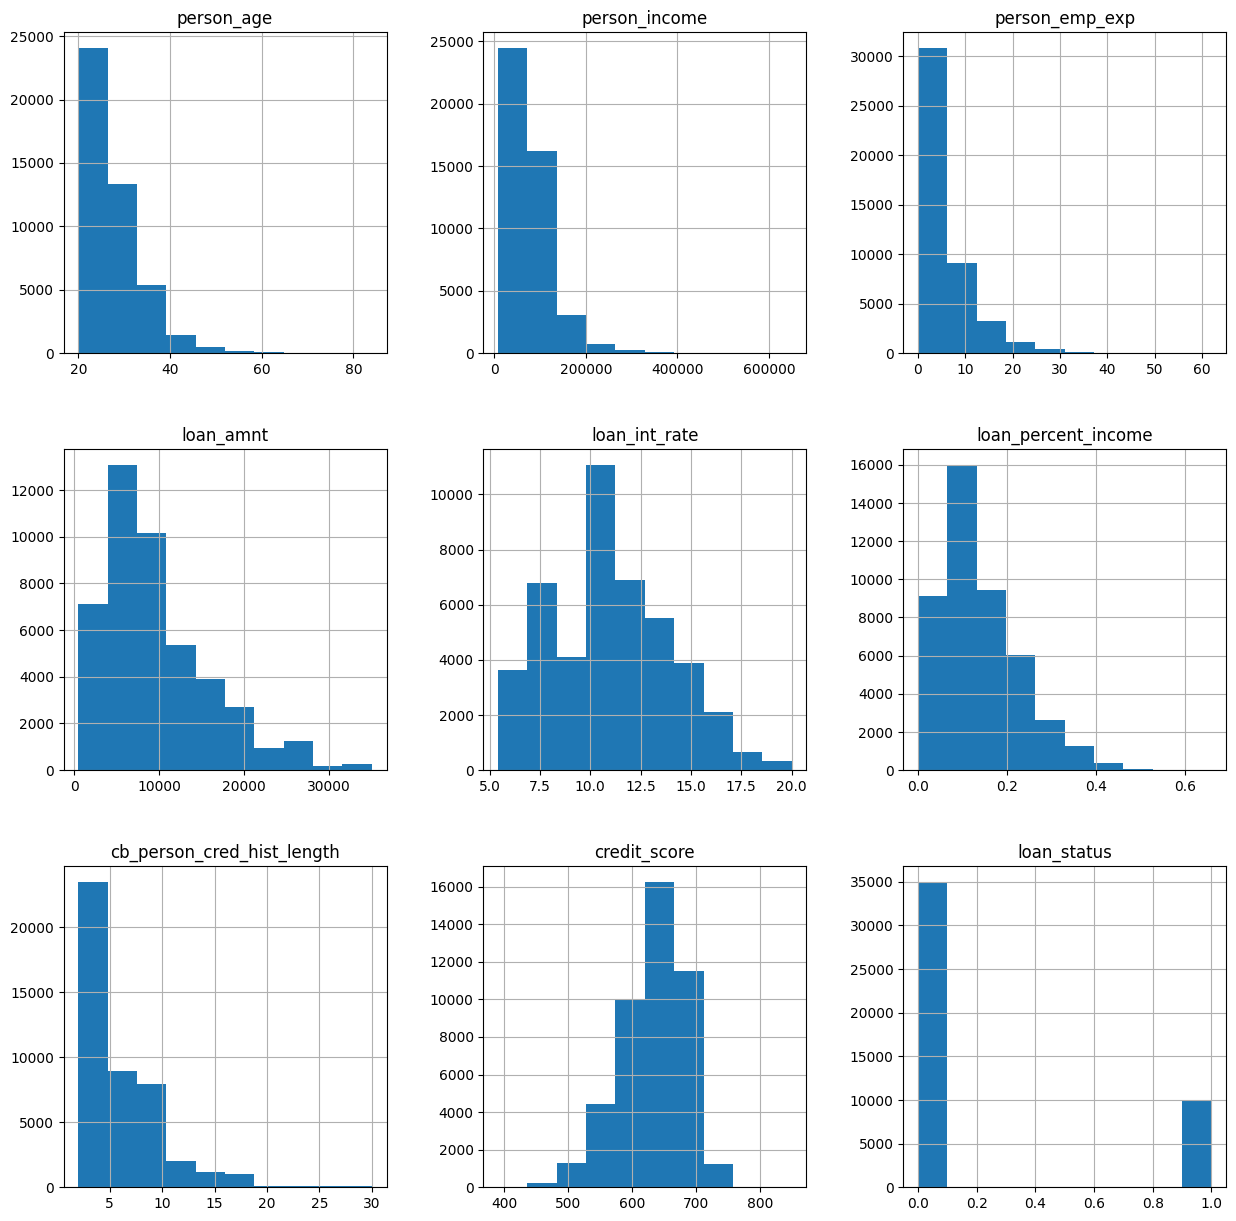

In [55]:
df.hist(figsize=(15,15))
plt.tight_layout
plt.show()

# *Model training*


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5851454)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5851454)

num_cols = make_column_selector(dtype_include=np.number)
cat_cols = make_column_selector(dtype_include=object)

pipeline_num = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

pipeline_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = make_column_transformer(
    (pipeline_num, num_cols),
    (pipeline_cat, cat_cols)
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=5851454))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8944444444444445
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      6948
         1.0       0.78      0.74      0.76      2052

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000



# *Predictions and Evaluations*

In [70]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.89375
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      5590
         1.0       0.77      0.74      0.76      1610

    accuracy                           0.89      7200
   macro avg       0.85      0.84      0.84      7200
weighted avg       0.89      0.89      0.89      7200



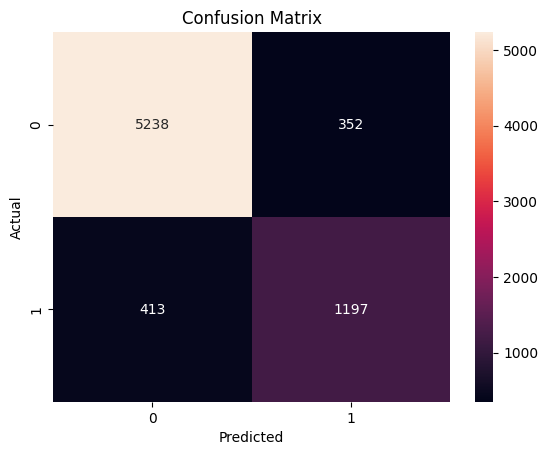

In [71]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## With an accuracy of 89%, this model is effective to predict a loan approval